Unzip results

In [ ]:
!unzip results_nu_05.zip

# Toy Datasets


In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
import os

experiment = 'results'
rmses_agg = {}
rmses_mean = {}
for dgp in np.arange(1, 7):
    rmses_agg[f'DGP {dgp}'] = {}
    rmses_mean[f'DGP {dgp}'] = {}
    for n in [1000]:
        for scale in [.1]:
            results = joblib.load(os.path.join('results_nu_05/toy', f'{experiment}_dgp_{dgp}_n_{n}_scale_01.jbl'))

            for r in results:
                r[1]['Uni'] = np.array([r[1][name] for name in ['T', 'S', 'IPS', 'DR', 'R', 'X', 'DRX']]).mean(axis=0)
                r[0]['Uni'] = np.mean((r[1]['Uni'] - r[1]['True'])**2)

            mses, _, _ = results[0]
            names = list(mses.keys())
            rmses_agg[f'DGP {dgp}'][f'$n={n},\sigma={scale}$'] = {}
            rmses_mean[f'DGP {dgp}'][f'$n={n},\sigma={scale}$'] = {}
            oracle = np.min(np.array([np.sqrt(np.array([r[0][name] for r in results])) for name in names
                                      if ((not name.startswith('Q')) and (not name.startswith('Best'))
                                          and (not name.startswith('Uni')))]),
                            axis=0)
            for name in names:
                if (name.endswith('3way') or name.endswith('split') or name.endswith('all')):
                    continue
                rmses = np.sqrt(np.array([r[0][name] for r in results])) - oracle
                rmses_agg[f'DGP {dgp}'][f'$n={n},\sigma={scale}$'][name] = np.median(rmses)
                rmses_mean[f'DGP {dgp}'][f'$n={n},\sigma={scale}$'][name] = np.mean(rmses)

            # rmses_agg[f'DGP {dgp}'][f'$n={n},\sigma={scale}$']['oracle'] = np.median(oracle)

        rmses_agg[f'DGP {dgp}'] = pd.DataFrame(rmses_agg[f'DGP {dgp}'])
        rmses_mean[f'DGP {dgp}'] = pd.DataFrame(rmses_mean[f'DGP {dgp}'])

rmses_agg = pd.concat(rmses_agg, axis=1)
rmses_mean = pd.concat(rmses_mean, axis=1)

Bar plot

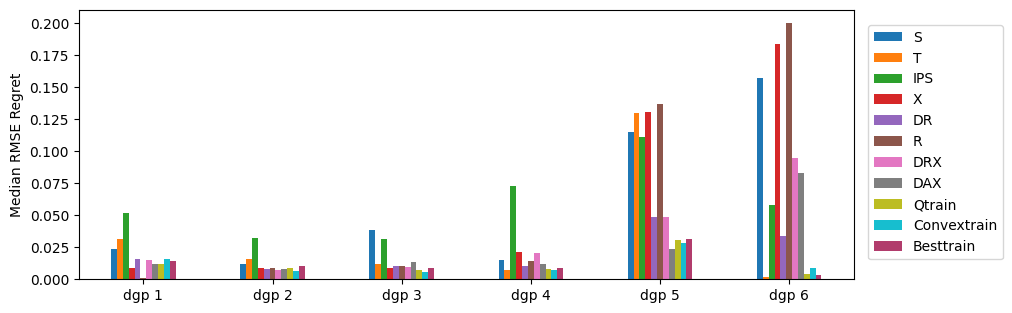

In [52]:
import seaborn as sns
regret_df = pd.DataFrame()
model_list = ['S','T','IPS','X','DR','R','DRX','DAX','Qtrain','Convextrain','Besttrain']
fig, axes = plt.subplots(1, 1,figsize=(6,3))
# axes.set_yscale('log')
for it, name in enumerate(model_list):
  regret_df.insert(it, name, rmses_agg.loc[name].values)

colors = sns.color_palette()
last_c = sns.color_palette("flare")
colors.append(last_c[-3])
regret_df = regret_df.rename(index=lambda s: "dgp "+ str(int(s)+1))
bar = regret_df.plot.bar(rot = 0,legend =True, ax = axes, color = colors, figsize=(10, 3.5))
bar.set_ylabel('Median RMSE Regret')
axes.legend(bbox_to_anchor=(1.01, 0.97))
plt.savefig('toy-datasets.png', dpi=600)

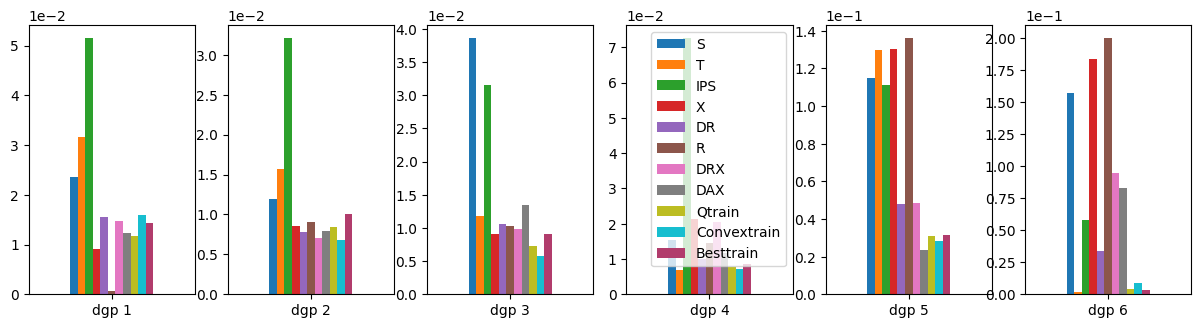

In [58]:
fig, axes = plt.subplots(1, 6,figsize=(15,3.5))
for dgp in range(6):
  ax = axes[dgp]
  dgp_df = pd.DataFrame(regret_df.iloc[dgp]).T
  if dgp==3:
    bar = dgp_df.plot.bar(rot = 0,legend =True, ax = ax, color = colors)
  else:
    bar = dgp_df.plot.bar(rot = 0,legend =False, ax = ax, color = colors)
  ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


Average over DGP

In [34]:
regret_df = pd.DataFrame()
model_list = ['S','T','IPS','X','DR','R','DRX','DAX','Qtrain','Convextrain','Besttrain']
# axes.set_yscale('log')
for it, name in enumerate(model_list):
  regret_df.insert(it, name, rmses_mean.loc[name].values)

weight_regret = regret_df.divide(regret_df.sum(axis=1)/11,axis=0)
weight_regret = weight_regret/6
avg = pd.DataFrame(weight_regret.sum(axis=0)).T
print(avg.to_latex(escape=False,float_format="{:0.3f}".format))
# avg


\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &     S &     T &   IPS &     X &    DR &     R &   DRX &   DAX &  Qtrain &  Convextrain &  Besttrain \\
\midrule
0 & 1.492 & 0.945 & 2.345 & 1.148 & 0.662 & 1.124 & 0.893 & 0.836 &   0.503 &        0.487 &      0.566 \\
\bottomrule
\end{tabular}



<ipython-input-34-66648abb982d>:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(avg.to_latex(escape=False,float_format="{:0.3f}".format))


Construct Table

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
import os

experiment = 'results'
rmses_agg = {}
cnt_dict = {}
cnt_c = 0
cnt_b=0
for dgp in np.arange(1, 7):
    rmses_agg[f'DGP {dgp}'] = {}
    num_neg_regret = {}
    for n in [1000]:
        for scale in [.1]:
            mean_dict = {}
            median_dict = {}
            results = joblib.load(os.path.join('results_nu_05/toy', f'{experiment}_dgp_{dgp}_n_{n}_scale_01.jbl'))

            for r in results:
                r[1]['Uni'] = np.array([r[1][name] for name in ['T', 'S', 'IPS', 'DR', 'R', 'X', 'DRX']]).mean(axis=0)
                r[0]['Uni'] = np.mean((r[1]['Uni'] - r[1]['True'])**2)

            mses, _, _ = results[0]
            names = list(mses.keys())
            rmses_agg[f'DGP {dgp}'][f'$n={n},\sigma={scale}$'] = {}
            oracle = np.min(np.array([np.sqrt(np.array([r[0][name] for r in results])) for name in names
                                      if ((not name.startswith('Q')) and (not name.startswith('Best'))
                                          and (not name.startswith('Uni')))]),
                            axis=0)
            rmse_crude={}
            for name in ['S','T','IPS','X','DR','R','DRX','DAX','Qtrain','Convextrain','Besttrain']:
                if (name.endswith('3way') or name.endswith('split') or name.endswith('all')):
                    continue
                rmses = np.sqrt(np.array([r[0][name] for r in results])) - oracle
                rmse_crude[name] = rmses
                mean_dict[name] = np.mean(rmses)
                median_dict[name] = np.median(rmses)
                num_neg_regret[name] = np.sum(rmses<0)
                content = '\makecell{'
                content += f'[{np.mean(rmses):.3f} $\pm$ {np.std(rmses):.3f}] \\\\ {np.median(rmses):.3f} ({np.percentile(rmses, 95):.3f})'
                content += '}'
                rmses_agg[f'DGP {dgp}'][f'$n={n},\sigma={scale}$'][name] = content
            c = np.sum(rmse_crude['Qtrain']< rmse_crude['Convextrain'])
            b = np.sum(rmse_crude['Qtrain']< rmse_crude['Besttrain'])
            cnt_dict[dgp] = (c,b)
            cnt_c = cnt_c+c
            cnt_b = cnt_b + b
            conv_m = 100*(mean_dict['Convextrain'] - mean_dict['Qtrain'])/mean_dict['Qtrain']
            conv_50 = 100*(median_dict['Convextrain'] - median_dict['Qtrain'])/median_dict['Qtrain']
            best_m = 100*(mean_dict['Besttrain'] - mean_dict['Qtrain'])/mean_dict['Qtrain']
            best_50 = 100*(median_dict['Besttrain'] - median_dict['Qtrain'])/median_dict['Qtrain']

            content = '\makecell{'
            content += f'{conv_m:.3f} $\%$ \\\\ {conv_50:.3f} $\%$'
            content += '}'
            rmses_agg[f'DGP {dgp}'][f'$n={n},\sigma={scale}$']['\makecell{$\%$ Decrease \\\ w.r.t Convex}'] = content

            content = '\makecell{'
            content += f'{best_m:.3f} $\%$ \\\\ {best_50:.3f} $\%$'
            content += '}'
            rmses_agg[f'DGP {dgp}'][f'$n={n},\sigma={scale}$']['\makecell{$\%$ Decrease \\\ w.r.t Best}'] = content

        rmses_agg[f'DGP {dgp}'] = pd.DataFrame(rmses_agg[f'DGP {dgp}'])
    print(f'DGP {dgp}:')
    print(num_neg_regret)

rmses_agg = pd.concat(rmses_agg, axis=1)

DGP 1:
{'S': 0, 'T': 0, 'IPS': 0, 'X': 0, 'DR': 0, 'R': 0, 'DRX': 0, 'DAX': 0, 'Qtrain': 2, 'Convextrain': 0, 'Besttrain': 0}
DGP 2:
{'S': 0, 'T': 0, 'IPS': 0, 'X': 0, 'DR': 0, 'R': 0, 'DRX': 0, 'DAX': 0, 'Qtrain': 1, 'Convextrain': 0, 'Besttrain': 0}
DGP 3:
{'S': 0, 'T': 0, 'IPS': 0, 'X': 0, 'DR': 0, 'R': 0, 'DRX': 0, 'DAX': 0, 'Qtrain': 2, 'Convextrain': 0, 'Besttrain': 0}
DGP 4:
{'S': 0, 'T': 0, 'IPS': 0, 'X': 0, 'DR': 0, 'R': 0, 'DRX': 0, 'DAX': 0, 'Qtrain': 4, 'Convextrain': 0, 'Besttrain': 0}
DGP 5:
{'S': 0, 'T': 0, 'IPS': 0, 'X': 0, 'DR': 0, 'R': 0, 'DRX': 0, 'DAX': 0, 'Qtrain': 2, 'Convextrain': 0, 'Besttrain': 0}
DGP 6:
{'S': 0, 'T': 0, 'IPS': 0, 'X': 0, 'DR': 0, 'R': 0, 'DRX': 0, 'DAX': 0, 'Qtrain': 16, 'Convextrain': 0, 'Besttrain': 0}


In [90]:
model_df = rmses_agg.loc[ ['S','T','IPS','X','DR','R','DRX','DAX','Besttrain','Convextrain','Qtrain']]
full_df=pd.concat([model_df, rmses_agg.iloc[-2:]])

In [92]:
print(full_df.to_latex(escape=False))

\begin{tabular}{lllllll}
\toprule
{} &                                            DGP 1 &                                            DGP 2 &                                            DGP 3 &                                            DGP 4 &                                            DGP 5 &                                            DGP 6 \\
{} &                              $n=1000,\sigma=0.1$ &                              $n=1000,\sigma=0.1$ &                              $n=1000,\sigma=0.1$ &                              $n=1000,\sigma=0.1$ &                              $n=1000,\sigma=0.1$ &                              $n=1000,\sigma=0.1$ \\
\midrule
S                                        &  \makecell{[0.026 $\pm$ 0.012] \\ 0.023 (0.047)} &  \makecell{[0.014 $\pm$ 0.009] \\ 0.012 (0.032)} &  \makecell{[0.037 $\pm$ 0.010] \\ 0.039 (0.051)} &  \makecell{[0.017 $\pm$ 0.006] \\ 0.015 (0.027)} &  \makecell{[0.122 $\pm$ 0.034] \\ 0.115 (0.186)} &  \makecell{[0.159 $\pm$ 0.026] \\ 0

<ipython-input-92-46f5438a8eb7>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(full_df.to_latex(escape=False))


# Semi-synthetic Datasets

In [6]:
all_models = ['T',
 'S',
 'IPS',
 'DR',
 'R',
 'X',
 'DRX',
 'DAX',
 'Qtrain',
 'Besttrain',
 'Qval',
 'Bestval',
 'Qcfit',
 'Bestcfit',
 'Convextrain',
 'Convexval',
 'Convexcfit',
 'Uni']

Check if each dataset has finished running.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

all_results = joblib.load('results_nu_05/semi_synthetic.jbl')
# all_results.keys()
('401k', True) in all_results.keys()

for ds in ['401k', 'criteo', 'welfare', 'poverty', 'star']:
    for simple in [True, False]:
      if (ds, simple) in all_results.keys():
        print(len(all_results[(ds,simple)]))

100
100
100
100
100
100
100
100


In [19]:
# Combine results
import os
rc_t = []
rc_f = []

for filename in os.scandir("results_nu_05"):
  if os.path.isfile(filename.path):
    r_c = joblib.load(filename.path)
    if 'true' in filename.path:
      rc_t.append(r_c)
    elif 'false' in filename.path:
      rc_f.append(r_c)

all_results[('criteo', True)] = rc_t
all_results[('criteo', False)] = rc_f

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

# all_results = joblib.load('all_results_full_xg.jbl')
regret_dict = {}
regret_95_dict = {}
better_baseline = {}
regret_mean_df = pd.DataFrame(columns=all_models)
regret_std_df = pd.DataFrame(columns=all_models)
regret_df = pd.DataFrame(columns=all_models)
regret_95_df = pd.DataFrame(columns=all_models)
num_neg_regret_df = pd.DataFrame(columns=all_models)
num_neg_regret = {}
cnt = 0
for ds in ['401k', 'welfare', 'poverty', 'star', 'criteo']:
    # regret_df = pd.DataFrame(columns=['X','Uni','DRX','R','T','S','DR','Qtrain','Qval','Qcfit'])
    r_df = pd.DataFrame(columns=all_models)
    r_95_df = pd.DataFrame(columns=all_models)
    for simple in [True, False]:
        results = all_results[(ds, simple)]
        mses, _,_ = results[0]
        names = list(mses.keys())
        rmses_agg = {}
        rmses_all = {}
        rmses_crude = {}
        for name in names:
            rmses = np.sqrt(np.array([r[0][name] for r in results]))
            rmses_crude[name] = rmses
            # clip top 1% failure modes
            q1 = np.percentile(rmses, 99)
            rmses = rmses[(rmses<q1)]
            rmses_all[name] = rmses
            rmses_agg[name] = {'mean': np.mean(rmses), 'std': np.std(rmses),
                               'stderr': np.std(rmses) / np.sqrt(len(results)),
                               'median': np.median(rmses)}

        better_baseline[ds+str(simple)] = np.sum(rmses_crude['Qtrain']< rmses_crude['Convextrain'])
        cnt = cnt + np.sum(rmses_crude['Qtrain']< rmses_crude['Convextrain'])

        agg_means = pd.DataFrame(rmses_agg).T['mean'].values
        min_rmse = np.min(agg_means)
        min_ind = np.argmin(agg_means)
        min_name = names[min_ind]
        min_rmse_std = rmses_agg[min_name]['stderr']
        print(min_rmse, min_name, min_rmse_std)

        oracle = np.min(np.array([np.sqrt(np.array([r[0][name] for r in results])) for name in names
                                  if ((not name.startswith('Q')) and (not name.startswith('Best'))
                                      and (not name.startswith('Uni')))]),
                        axis=0)
        rmses_all['oracle'] = oracle
        rmses_agg['oracle'] = {'mean': np.mean(oracle), 'std': np.std(oracle),
                               'stderr': np.std(oracle) / np.sqrt(len(results)),
                               'median': np.median(oracle)}

        regret_median = {}
        regret_95 = {}
        regret_mean = {}
        regret_std = {}
        for name in names:
          rmses = np.sqrt(np.array([r[0][name] for r in results]))
          # clip top 1% failure modes
          q1 = np.percentile(rmses, 99)
          regret = rmses[(rmses<q1)] - oracle[(rmses<q1)]
          regret_median[name] = np.median(regret)
          regret_mean[name] = np.mean(regret)
          regret_std[name] = np.std(regret)
          regret_95[name] = np.percentile(regret, 95)
          num_neg_regret[name] = np.sum(regret<0)

        temp = pd.DataFrame(regret_median,index=[0])
        temp2 = pd.DataFrame(regret_95,index=[0])
        temp3 = pd.DataFrame(regret_mean,index=[0])
        temp4 = pd.DataFrame(regret_std,index=[0])
        temp5 = pd.DataFrame(num_neg_regret,index=[0])

        regret_df.loc[ds+str(simple)] = temp.iloc[0,:]
        regret_95_df.loc[ds+str(simple)] = temp2.iloc[0,:]
        regret_mean_df.loc[ds+str(simple)] = temp3.iloc[0,:]
        regret_std_df.loc[ds+str(simple)] = temp4.iloc[0,:]
        num_neg_regret_df.loc[ds+str(simple)] = temp5.iloc[0,:]

        if simple:
          r_df.loc['Simple'] = temp.iloc[0,:]
          r_95_df.loc['Simple'] = temp2.iloc[0,:]
        else:
          r_df.loc['Fitted'] = temp.iloc[0,:]
          r_95_df.loc['Fitted'] = temp2.iloc[0,:]

    regret_dict[ds] = r_df
    regret_95_dict[ds] = r_95_df

print(cnt)

1128.8238247559882 Xall 12.585256378858636
308.53202642049513 Sall 13.854904007001712
0.07217158705632444 Xall 0.0014376772729072127
0.007357652671802662 Sall 0.0001778509225162533
0.012708215066675558 Sall 0.00059327173082256
0.00013129293119550764 Sall 3.088189944575483e-05
0.08921632017494732 Sall 0.0020208422080216434
0.16624785696438532 Sall 0.016013275269146747
0.002315655454973678 Xall 3.0122790101485713e-05
1.7799485655072624e-06 Sall 4.3280499447073673e-07
515


In [38]:
regret_mean_df

,T,S,IPS,DR,R,X,DRX,DAX,Qtrain,Besttrain,Qval,Bestval,Qcfit,Bestcfit,Convextrain,Convexval,Convexcfit,Uni
401kTrue,1171.672883,2042.420050,5844.784438,581.004273,727.457906,302.563979,460.488801,446.643308,326.182552,354.995182,359.555153,396.309312,375.926025,401.256975,362.314082,415.942178,442.251311,739.096335
401kFalse,1525.870372,115.051693,1643.411420,321.796944,410.212256,431.697952,314.472434,501.582381,221.403363,257.492277,205.671107,225.681594,202.601065,233.087099,266.220339,244.067790,237.710540,362.968614
welfareTrue,0.054585,0.094673,0.793734,0.052223,0.087151,0.033707,0.050973,0.072695,0.031186,0.039029,0.031302,0.038537,0.032391,0.036910,0.028866,0.029151,0.029826,0.094650
welfareFalse,0.003295,0.002910,0.034257,0.006328,0.009462,0.003899,0.006318,0.005190,0.002186,0.002861,0.002180,0.002854,0.002184,0.002779,0.001887,0.001872,0.001882,0.006221
povertyTrue,0.019331,0.004988,0.173857,0.024085,0.024840,0.015913,0.023967,0.014749,0.006201,0.007506,0.005980,0.007155,0.006189,0.007672,0.006608,0.006368,0.006651,0.027857
povertyFalse,0.008770,0.000208,0.021931,0.002494,0.006799,0.003177,0.002477,0.006243,0.001687,0.001735,0.001644,0.001468,0.001998,0.001990,0.002283,0.002270,0.002564,0.004418
starTrue,0.022364,0.005544,0.629368,0.020612,0.027954,0.014493,0.019832,0.013348,0.009687,0.010738,0.009086,0.010075,0.009243,0.010161,0.009526,0.008657,0.008727,0.047720
starFalse,4.324959,0.084303,345.671816,1.679057,0.892515,1.391645,0.853644,1.221608,2.053422,2.001835,2.201516,2.241207,2.296123,2.353404,2.162936,2.324246,2.381335,43.279854
criteoTrue,0.001358,0.001508,0.054327,0.001052,0.003021,0.000794,0.000816,0.001451,0.000614,0.000807,0.000599,0.000785,0.000598,0.000836,0.000658,0.000641,0.000658,0.005753
criteoFalse,0.003336,0.000002,0.002272,0.000063,0.000813,0.000129,0.000058,0.000899,0.000216,0.000022,0.000206,0.000020,0.000209,0.000022,0.000267,0.000279,0.000292,0.000576


Average over simple datasets:

In [36]:
mean_simple = regret_mean_df.iloc[[0,2,4,6,8]]
mean_simple = pd.DataFrame(mean_simple,columns = ['S','T','IPS','X','DR','R','DRX','DAX','Qtrain','Convextrain','Besttrain'])
weight_regret = mean_simple.divide(mean_simple.sum(axis=1)/11,axis=0)
weight_regret = weight_regret/5
avg = pd.DataFrame(weight_regret.sum(axis=0)).T
print(avg.to_latex(escape=False,float_format="{:0.3f}".format))
# avg

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &     S &     T &   IPS &     X &    DR &     R &   DRX &   DAX &  Qtrain &  Convextrain &  Besttrain \\
\midrule
0 & 0.611 & 0.534 & 7.078 & 0.284 & 0.444 & 0.618 & 0.410 & 0.384 &   0.198 &        0.204 &      0.234 \\
\bottomrule
\end{tabular}



<ipython-input-36-11d5b1d6c6a1>:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(avg.to_latex(escape=False,float_format="{:0.3f}".format))


Average over fitted datasets:

In [37]:
mean_simple = regret_mean_df.iloc[[1,3,5,7,9]]
mean_simple = pd.DataFrame(mean_simple,columns = ['S','T','IPS','X','DR','R','DRX','DAX','Qtrain','Convextrain','Besttrain'])
weight_regret = mean_simple.divide(mean_simple.sum(axis=1)/11,axis=0)
weight_regret = weight_regret/5
avg = pd.DataFrame(weight_regret.sum(axis=0)).T
print(avg.to_latex(escape=False,float_format="{:0.3f}".format))
# avg

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &     S &     T &   IPS &     X &    DR &     R &   DRX &   DAX &  Qtrain &  Convextrain &  Besttrain \\
\midrule
0 & 0.133 & 1.920 & 5.113 & 0.432 & 0.417 & 0.901 & 0.407 & 0.819 &   0.278 &        0.323 &      0.258 \\
\bottomrule
\end{tabular}



<ipython-input-37-2bb12f79bb86>:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(avg.to_latex(escape=False,float_format="{:0.3f}".format))


Bar plot

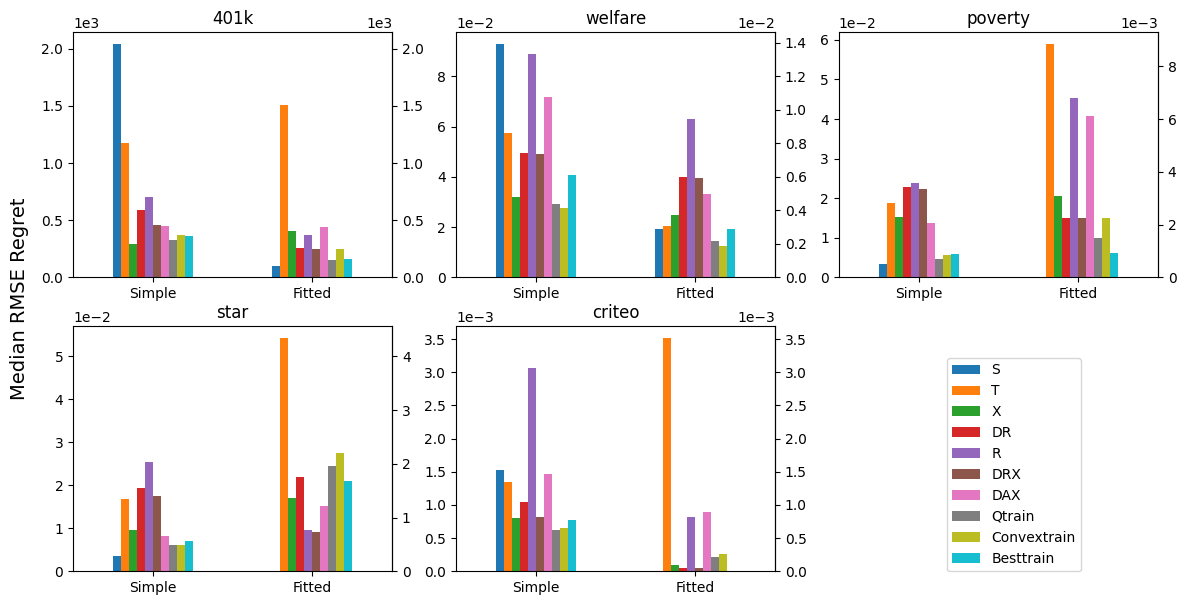

In [59]:
import seaborn as sns
fig, axes = plt.subplots(2, 3,figsize=(14,7))
count=0
factors = {'401k':1, 'welfare':0.15, 'poverty':0.15, 'star':80, 'criteo':1}
# 'IPS' omitted
models_inc = ['S','T','X','DR','R','DRX','DAX','Qtrain','Convextrain','Besttrain']
colors = sns.color_palette()
last_c = sns.color_palette("flare")
# colors.append(last_c[0])
colors.append(last_c[-3])
# colors.append(last_c[6])
for ds in ['401k', 'welfare', 'poverty', 'star', 'criteo']:
  fd_p = regret_dict[ds]
  # fd_p = pd.DataFrame(fd_p,columns = ['R','T','S','X','DR','DRX','DAX','Qtrain','Convextrain','Besttrain']) #'Uni'
  fd_p = pd.DataFrame(fd_p,columns = models_inc)
  factor = factors[ds]
  ax = axes[count//3,count%3]
  # ax.set_yscale('log')

  fd_p.iloc[1,:] = fd_p.iloc[1,:]/factor
  bar = fd_p.plot.bar(rot = 0,legend =False, ax=ax, color = colors)
  count+=1
  bar.set_title(ds)
  ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


lastSubplot = plt.subplot(2,3,6)
lastSubplot.set_frame_on(False)
lastSubplot.get_xaxis().set_visible(False)
lastSubplot.get_yaxis().set_visible(False)

for i in range(5):
  ax = axes[i//3,i%3]
  if i==0:
    secax = ax.secondary_yaxis('right', functions=(lambda x:x*1, lambda x:x/1))
    secax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
  elif i==1:
    secax = ax.secondary_yaxis('right', functions=(lambda x:x*0.15, lambda x:x/0.15))
    secax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
  elif i==2:
    secax = ax.secondary_yaxis('right', functions=(lambda x:x*0.15, lambda x:x/0.15))
    secax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
  elif i==3:
    secax = ax.secondary_yaxis('right', functions=(lambda x:x*80, lambda x:x/80))
    secax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
  elif i==4:
    secax = ax.secondary_yaxis('right', functions=(lambda x:x*1, lambda x:x/1))
    secax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

fig.text(0.08, 0.5, 'Median RMSE Regret', va='center', rotation='vertical',fontsize=14)
# fig.text(0.35, 0.94, 'Median RMSE Regret for Semi-synthetic Datasets',va='center', rotation='horizontal',fontsize=14)

handles, labels = bar.get_legend_handles_labels()
fig.legend(handles, labels,loc='lower right', bbox_to_anchor=(0.85, 0.10, 0, 0))
# fig.suptitle("QTrain")

Construct Table

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
import os

rmses_agg = {}
for ds in ['401k', 'welfare', 'poverty', 'star', 'criteo']:
    rmses_agg[ds] = {}
    for Simple in [False]: # change this to switch between simple and fitted
        rmses_agg[ds][str(Simple)] = {}
        mean_dict = {}
        median_dict = {}
        for name in ['DR', 'DRX', 'IPS', 'R', 'S', 'T', 'X', 'DAX', 'Qtrain', 'Convextrain', 'Besttrain']:
            mean = regret_mean_df.loc[ds+str(Simple),name]
            mean_dict[name] = mean
            std = regret_std_df.loc[ds+str(Simple),name]
            median = regret_df.loc[ds+str(Simple),name]
            median_dict[name] = median
            per_95 = regret_95_df.loc[ds+str(Simple),name]
            content = '\makecell{'
            if ds == '401k':
              content += f'[{mean:.4g} $\pm$ {std:.4g}] \\\\ {median:.4g} ({per_95:.4g})'
            elif ds == 'criteo':
              content += f'[{mean:.5f} $\pm$ {std:.5f}] \\\\ {median:.4f} ({per_95:.5f})'
            else:
              content += f'[{mean:.4f} $\pm$ {std:.4f}] \\\\ {median:.4f} ({per_95:.4f})'
            content += '}'
            rmses_agg[ds][str(Simple)][name] = content
        conv_m = 100*(mean_dict['Convextrain'] - mean_dict['Qtrain'])/mean_dict['Qtrain']
        conv_50 = 100*(median_dict['Convextrain'] - median_dict['Qtrain'])/median_dict['Qtrain']
        best_m = 100*(mean_dict['Besttrain'] - mean_dict['Qtrain'])/mean_dict['Qtrain']
        best_50 = 100*(median_dict['Besttrain'] - median_dict['Qtrain'])/median_dict['Qtrain']

        content = '\makecell{'
        content += f'{conv_m:.4f} $\%$ \\\\ {conv_50:.4f} $\%$'
        content += '}'
        rmses_agg[ds][str(Simple)]['\makecell{$\%$ Decrease \\\ w.r.t Convex}'] = content

        content = '\makecell{'
        content += f'{best_m:.4f} $\%$ \\\\ {best_50:.4f} $\%$'
        content += '}'
        rmses_agg[ds][str(Simple)]['\makecell{$\%$ Decrease \\\ w.r.t Best}'] = content

    rmses_agg[ds] = pd.DataFrame(rmses_agg[ds])

rmses_agg = pd.concat(rmses_agg, axis=1)

In [101]:
model_df = rmses_agg.loc[ ['S','T','IPS','X','DR','R','DRX','DAX','Besttrain','Convextrain','Qtrain']]
full_df=pd.concat([model_df, rmses_agg.iloc[-2:]])

In [102]:
with pd.option_context("max_colwidth", 1000):
    print(full_df.to_latex(escape=False))

\begin{tabular}{llllll}
\toprule
{} &                                             401k &                                              welfare &                                              poverty &                                                         star &                                                  criteo \\
{} &                                            False &                                                False &                                                False &                                                        False &                                                   False \\
\midrule
S                                        &  \makecell{[115.1 $\pm$ 104.1] \\ 98.59 (306.3)} &  \makecell{[0.0029 $\pm$ 0.0018] \\ 0.0029 (0.0061)} &  \makecell{[0.0002 $\pm$ 0.0004] \\ 0.0000 (0.0013)} &          \makecell{[0.0843 $\pm$ 0.1903] \\ 0.0000 (0.4518)} &  \makecell{[0.00000 $\pm$ 0.00001] \\ 0.0000 (0.00001)} \\
T                                        &     \makecell

<ipython-input-102-1bd2f8e82e73>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(full_df.to_latex(escape=False))
